In [20]:
import pandas as pd
import os
import psycopg2
os.getcwd()

'c:\\Users\\finnd\\OneDrive\\1.1 Python Projects\\Database'

In [21]:
file = r'C:\Users\finnd\OneDrive\1.1 Python Projects\Database\data\all_agencies2024.xlsx'
df = pd.read_excel(file, sheet_name = 'Sheet1', skiprows = 10)

In [22]:
unique_agencies = df['Agency Name'].unique()
unique_suppliers = df[['Supplier Name', 'Supplier ABN']].drop_duplicates()
unique_categories = df['Category'].unique()

In [36]:
conn = psycopg2.connect(
    dbname="austender",  # Replace with your database name
    user="postgres",  # Replace with your username
    password="password",  # Replace with your password
    host="localhost",  # Use 'localhost' if the database is on your local machine
    port="5432"  # Default PostgreSQL port
)
cur = conn.cursor()

# Insert contract data directly into the contracts table
for index, row in df.iterrows():
    cur.execute("""
        INSERT INTO contracts (agency_name, supplier_name, category_name, description, agency_ref_id, 
                               confidentiality_contract, confidentiality_reason_contract, 
                               confidentiality_outputs, confidentiality_reason_outputs, 
                               publish_date, start_date, end_date, value_aud)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (row['Agency Name'], row['Supplier Name'], row['Category'], row['Description'], row['Agency Ref. ID'], 
          row['Confidentiality - Contract'], row['Confidentiality Reason(s) - Contract'], 
          row['Confidentiality - Outputs'], row['Confidentiality Reason(s) - Outputs'], 
          row['Publish Date'], row['Start Date'], row['End Date'], row['Value (AUD)']))

# Commit the changes
conn.commit()

# Close the connection
cur.close()
conn.close()

C:\Users\finnd\AppData\Local\Temp\ipykernel_23364\2135945881.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


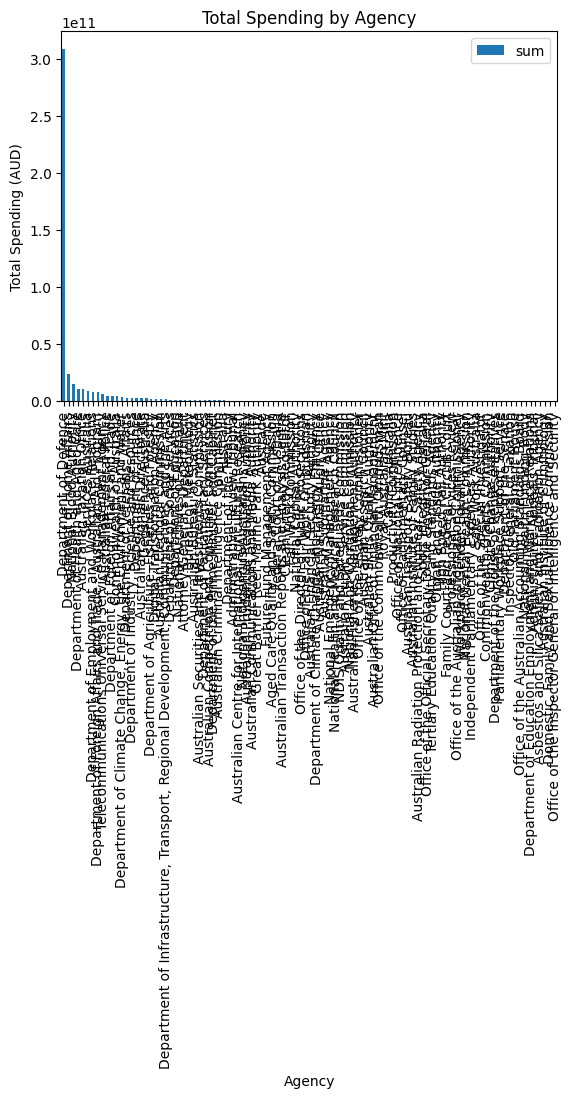

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import psycopg2

# Connect to PostgreSQL
conn = psycopg2.connect(dbname="austender", user="postgres", password="password", host="localhost", port="5432")
query = "SELECT agency_name, SUM(value_aud) FROM contracts GROUP BY agency_name ORDER BY SUM(value_aud) DESC"

# Load data into a pandas DataFrame
df = pd.read_sql(query, conn)

# Plot the data
df.plot(kind='bar', x='agency_name', y='sum', title='Total Spending by Agency')
plt.xlabel('Agency')
plt.ylabel('Total Spending (AUD)')
plt.show()


In [43]:
conn = psycopg2.connect(dbname="austender", user="postgres", password="password", host="localhost", port="5432")
query = "SELECT agency_name, category_name, value_aud FROM contracts"

# Load data into a pandas DataFrame
df = pd.read_sql(query, conn)

df

C:\Users\finnd\AppData\Local\Temp\ipykernel_23364\2927846093.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,agency_name,category_name,value_aud
0,Administrative Appeals Tribunal,Temporary personnel services,114114.00
1,Administrative Appeals Tribunal,Computer support parts or accessories,121925.98
2,Administrative Appeals Tribunal,Temporary personnel services,114708.00
3,Administrative Appeals Tribunal,Management advisory services,132786.50
4,Administrative Appeals Tribunal,Management advisory services,132786.50
...,...,...,...
40007,Workplace Gender Equality Agency,Management advisory services,308000.00
40008,Workplace Gender Equality Agency,Management advisory services,412500.00
40009,Workplace Gender Equality Agency,Temporary personnel services,210080.00
40010,Workplace Gender Equality Agency,Software,108108.00


In [45]:
# Filter for Department of Defense (replace with the actual name in your dataset)
df_defense = df[df['agency_name'] == 'Department of Defence']

# Group by category and calculate the total spending by category
category_totals = df_defense.groupby('category_name')['value_aud'].sum().sort_values(ascending=False)

# Display the first few rows to verify the data
print(category_totals.head())


category_name
Building construction and support and maintenance and repair services    3.977621e+10
Aircraft                                                                 3.584509e+10
Professional engineering services                                        2.234644e+10
Military fixed wing aircraft                                             1.898191e+10
Military rotary wing aircraft                                            1.745000e+10
Name: value_aud, dtype: float64


In [54]:
category_totals = category_totals.reset_index()
print(category_totals.head())

                                       category_name     value_aud
0  Building construction and support and maintena...  3.977621e+10
1                                           Aircraft  3.584509e+10
2                  Professional engineering services  2.234644e+10
3                       Military fixed wing aircraft  1.898191e+10
4                      Military rotary wing aircraft  1.745000e+10


In [56]:
pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for nbformat from https://files.pythonhosted.org/packages/a9/82/0340caa499416c78e5d8f5f05947ae4bc3cba53c9f038ab6e9ed964e22f1/nbformat-5.10.4-py3-none-any.whl.metadata
  Obtaining dependency information for fastjsonschema>=2.15 from https://files.pythonhosted.org/packages/90/2b/0817a2b257fe88725c25589d89aec060581aabf668707a8d03b2e9e0cb2a/fastjsonschema-2.21.1-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema>=2.6 from https://files.pythonhosted.org/packages/69/4a/4f9dbeb84e8850557c02365a0eee0649abe5eb1d84af92a25731c6c0f922/jsonschema-4.23.0-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=22.2.0 from https://files.pythonhosted.org/packages/fc/30/d4986a882011f9df997a55e6becd864812ccfcd821d64aac8570ee39f719/attrs-25.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for jsonschema-specifications>=2023.03.6 from https://files.py


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import plotly.express as px

# Create a Treemap
fig = px.treemap(category_totals, 
                 path=['category_name'],  # Labels for the treemap
                 values='value_aud',  # Values for the size of each square
                 title="Total Spending by Category - Department of Defense")

# Show the plot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed